# "Predicting Feed Grain Prices Using Machine Learning: A Data-Driven Approach for Agriculture and Market Analysis"

<img src="mlpic.jpg" alt="mlpic.jpg" width="1000" />



NAME : P KALIDASAN 

ORGANIZATION : ENTRI ELEVATE

DATE: 25th SEPTEMBER 2024

### OVERVIEW

This is the project related to the pricing of feed grains is a crucial factor for agriculture and farming industries. Farmers, suppliers, and market analysts require accurate predictions of feed grain prices to make informed decisions on production, inventory management, and pricing strategies. However, the fluctuating nature of market demand, seasonal trends, and economic factors make price prediction a challenging task. Developing a machine learning model can aid in forecasting feed grain prices accurately.

### OBJECTIVE

The objective of this project is to develop a machine learning model that predicts feed grain prices based on historical data of commodities, geography, and time.

###  Data Description

Source of the Dataset:https://data.world/cdc2019/agriculture

Features:

o	SC_Group_Desc: Describes the group, such as "Prices."

o	SC_GroupCommod_Desc: Describes the commodity (e.g., "Oats").

o	SC_GeographyIndented_Desc: Geographic location.

o	SC_Attribute_Desc: Attribute description, such as "Prices received by farmers."

o	SC_Unit_Desc: Unit of the amount (e.g., "Dollars per bushel").

o	Year_ID: Year of the record.

o	Timeperiod_Desc: Time period (monthly).

o	Amount: Target variable, representing the price.


### IMPORT LIBRARIES

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error


### LOADING THE DATASET

In [59]:
#Loading the dataset from the given file
df=pd.read_csv("FeedGrains.csv")

In [4]:
#showing the head of the dataset
df.head()

,SC_Group_ID,SC_Group_Desc,SC_GroupCommod_Desc,SC_Geography_ID,SortOrder,SC_GeographyIndented_Desc,SC_Commodity_ID,SC_Commodity_Desc,SC_Attribute_ID,SC_Attribute_Desc,SC_Unit_ID,SC_Unit_Desc,Year_ID,SC_Frequency_ID,SC_Frequency_Desc,Timeperiod_ID,Timeperiod_Desc,Amount
0,1,Prices,Oats,1,0.8,United States,3,Oats,5,Prices received by farmers,4,Dollars per bushel,1948,1,Monthly,8,Aug,0.69
1,1,Prices,Oats,1,0.8,United States,3,Oats,5,Prices received by farmers,4,Dollars per bushel,1948,1,Monthly,9,Sep,0.69
2,1,Prices,Oats,1,0.8,United States,3,Oats,5,Prices received by farmers,4,Dollars per bushel,1948,1,Monthly,10,Oct,0.70
3,1,Prices,Oats,1,0.8,United States,3,Oats,5,Prices received by farmers,4,Dollars per bushel,1948,1,Monthly,11,Nov,0.76
4,1,Prices,Oats,1,0.8,United States,3,Oats,5,Prices received by farmers,4,Dollars per bushel,1948,1,Monthly,12,Dec,0.76


In [5]:
#Showing the tail of the dataset
df.tail()

,SC_Group_ID,SC_Group_Desc,SC_GroupCommod_Desc,SC_Geography_ID,SortOrder,SC_GeographyIndented_Desc,SC_Commodity_ID,SC_Commodity_Desc,SC_Attribute_ID,SC_Attribute_Desc,SC_Unit_ID,SC_Unit_Desc,Year_ID,SC_Frequency_ID,SC_Frequency_Desc,Timeperiod_ID,Timeperiod_Desc,Amount
463113,3,Exports and imports,Corn,204,187.0,China (Taiwan),2,Corn,19,"Imports, to U.S. from specified source",7,"1,000 metric tons",2019,1,Monthly,7,Jul,0.631104
463114,2,Supply and use,Corn,204,187.0,China (Taiwan),2,Corn,35,"Exports, trade year",7,"1,000 metric tons",1991,3,Annual,114,MY Oct-Sep,10.000000
463115,2,Supply and use,Corn,204,187.0,China (Taiwan),2,Corn,35,"Exports, trade year",7,"1,000 metric tons",1992,3,Annual,114,MY Oct-Sep,17.000000
463116,3,Exports and imports,Corn,204,187.0,China (Taiwan),11,Corn grain,19,"Imports, to U.S. from specified source",7,"1,000 metric tons",2018,3,Annual,31,MY Sep-Aug,0.000306
463117,3,Exports and imports,Corn,204,187.0,China (Taiwan),11,Corn grain,19,"Imports, to U.S. from specified source",7,"1,000 metric tons",2019,1,Monthly,5,May,0.000306


In [6]:
# Display the basic informations about the dataset and finding the null values
print(df.info())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463118 entries, 0 to 463117
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SC_Group_ID                463118 non-null  int64  
 1   SC_Group_Desc              463118 non-null  object 
 2   SC_GroupCommod_Desc        455269 non-null  object 
 3   SC_Geography_ID            463118 non-null  int64  
 4   SortOrder                  463118 non-null  float64
 5   SC_GeographyIndented_Desc  463118 non-null  object 
 6   SC_Commodity_ID            463118 non-null  int64  
 7   SC_Commodity_Desc          463118 non-null  object 
 8   SC_Attribute_ID            463118 non-null  int64  
 9   SC_Attribute_Desc          463118 non-null  object 
 10  SC_Unit_ID                 463118 non-null  int64  
 11  SC_Unit_Desc               463118 non-null  object 
 12  Year_ID                    463118 non-null  int64  
 13  SC_Frequency_ID            46

SC_Group_ID                     0
SC_Group_Desc                   0
SC_GroupCommod_Desc          7849
SC_Geography_ID                 0
SortOrder                       0
SC_GeographyIndented_Desc       0
SC_Commodity_ID                 0
SC_Commodity_Desc               0
SC_Attribute_ID                 0
SC_Attribute_Desc               0
SC_Unit_ID                      0
SC_Unit_Desc                    0
Year_ID                         0
SC_Frequency_ID                 0
SC_Frequency_Desc               0
Timeperiod_ID                   0
Timeperiod_Desc                 0
Amount                          0
dtype: int64

In [7]:
# Removing the nullvalues
mode = df['SC_GroupCommod_Desc'].mode()[0]
df['SC_GroupCommod_Desc'] = df['SC_GroupCommod_Desc'].fillna(mode)


In [8]:
#Rechecking the nullvalues
df.isnull().sum()

SC_Group_ID                  0
SC_Group_Desc                0
SC_GroupCommod_Desc          0
SC_Geography_ID              0
SortOrder                    0
SC_GeographyIndented_Desc    0
SC_Commodity_ID              0
SC_Commodity_Desc            0
SC_Attribute_ID              0
SC_Attribute_Desc            0
SC_Unit_ID                   0
SC_Unit_Desc                 0
Year_ID                      0
SC_Frequency_ID              0
SC_Frequency_Desc            0
Timeperiod_ID                0
Timeperiod_Desc              0
Amount                       0
dtype: int64

In [9]:
# Showing described info of the dataset
df.describe()

,SC_Group_ID,SC_Geography_ID,SortOrder,SC_Commodity_ID,SC_Attribute_ID,SC_Unit_ID,Year_ID,SC_Frequency_ID,Timeperiod_ID,Amount
count,463118.000000,463118.000000,463118.000000,463118.000000,463118.000000,463118.000000,463118.000000,463118.000000,463118.000000,4.631180e+05
mean,2.836886,88.719387,76.592939,34.930059,22.775070,7.674871,2002.218568,1.388320,15.897797,6.591591e+05
std,0.756613,82.007304,78.348583,34.568156,6.034082,3.900039,13.226970,0.771797,26.082172,2.326463e+07
min,1.000000,1.000000,0.020000,1.000000,1.000000,1.000000,1866.000000,1.000000,1.000000,-6.353320e+02
25%,3.000000,30.000000,1.600000,2.000000,19.000000,7.000000,1995.000000,1.000000,4.000000,8.882811e-02
50%,3.000000,51.000000,57.500000,14.000000,24.000000,7.000000,2004.000000,1.000000,8.000000,2.275850e+00
75%,3.000000,141.000000,150.000000,76.000000,24.000000,7.000000,2012.000000,1.000000,12.000000,4.439208e+01
max,7.000000,339.000000,285.000000,212.000000,61.000000,46.000000,2019.000000,3.000000,137.000000,2.597865e+09


In [10]:
df.describe(include='object')

,SC_Group_Desc,SC_GroupCommod_Desc,SC_GeographyIndented_Desc,SC_Commodity_Desc,SC_Attribute_Desc,SC_Unit_Desc,SC_Frequency_Desc,Timeperiod_Desc
count,463118,463118,463118,463118,463118,463118,463118,463118
unique,7,13,273,84,43,23,3,48
top,Exports and imports,Corn,United States,Corn,"Exports, from U.S. to specified destination","1,000 metric tons",Monthly,MY Sep-Aug
freq,379129,226788,41983,78913,248329,366132,366211,32010


In [11]:
#Showing the shape
print(df.shape)

(463118, 18)


In [12]:
#Checking the duplicates
df.duplicated().sum()

0

In [13]:
print(df.columns)

Index(['SC_Group_ID', 'SC_Group_Desc', 'SC_GroupCommod_Desc',
       'SC_Geography_ID', 'SortOrder', 'SC_GeographyIndented_Desc',
       'SC_Commodity_ID', 'SC_Commodity_Desc', 'SC_Attribute_ID',
       'SC_Attribute_Desc', 'SC_Unit_ID', 'SC_Unit_Desc', 'Year_ID',
       'SC_Frequency_ID', 'SC_Frequency_Desc', 'Timeperiod_ID',
       'Timeperiod_Desc', 'Amount'],
      dtype='object')


### EXPLORATORY DATA ANALYSIS (EDA)

### Graph -1

<Axes: xlabel='count', ylabel='SC_GroupCommod_Desc'>

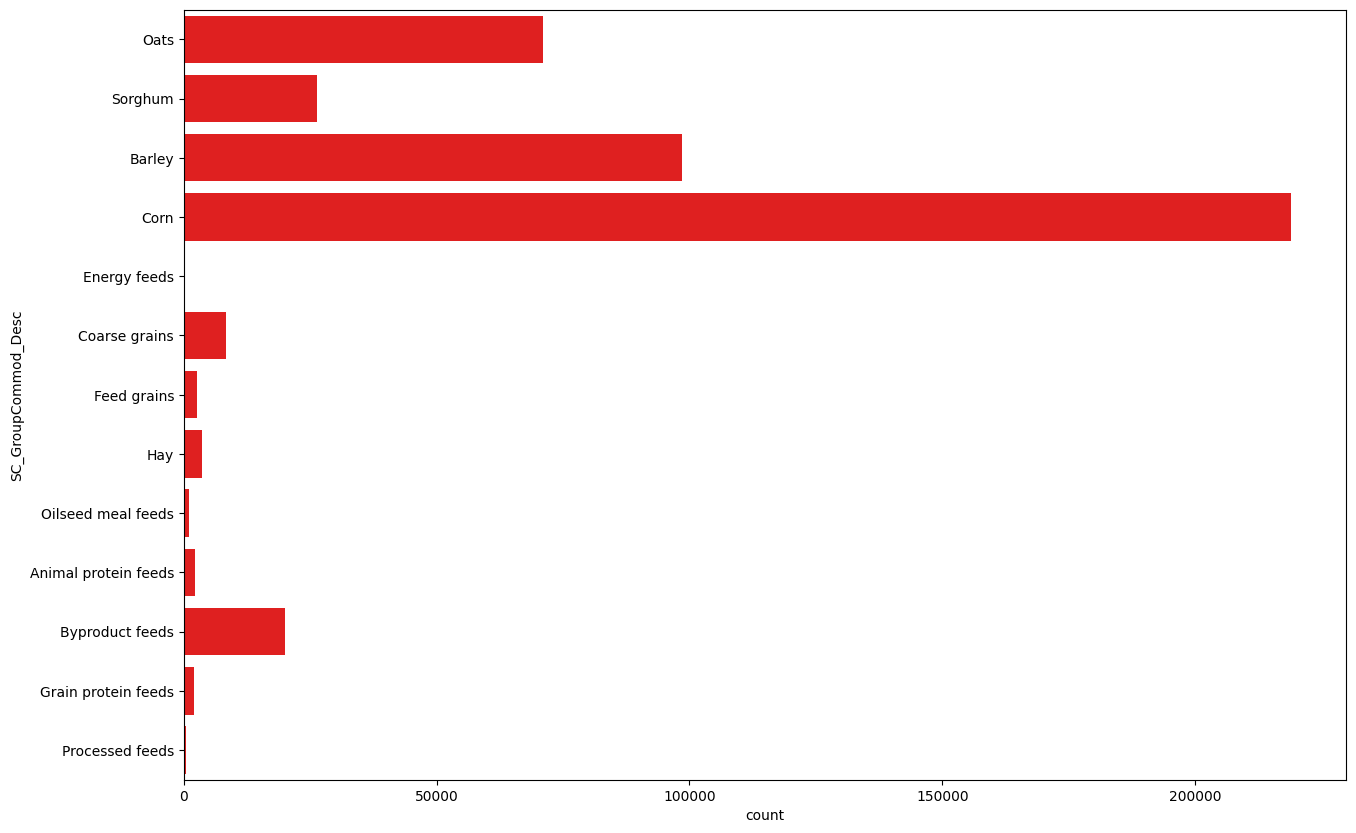

In [60]:
#Count plot of commodities

#Plotting
plt.figure(figsize=(15,10))
sns.countplot(y='SC_GroupCommod_Desc', data=df, color='red', legend=False)

Insights of the chart

The barplot appears here to show the distribution of values for the SC_GroupCommod_Desc column.From the analysis we can see that the majority of the data is concentrated around a few specific commodities, as shown by the large bars for categories like 1, 4, and 9.And the categories like 2, 9, and 1 also have a outstanding number of records, but to a much lesser extent than category 4. The rest of the commodities (categories 0, 3, 7, 8, 10, 11, etc.) appear to have relatively few records in comparison, indicating they are less represented.

### Graph-2

<Axes: xlabel='count', ylabel='SC_Group_Desc'>

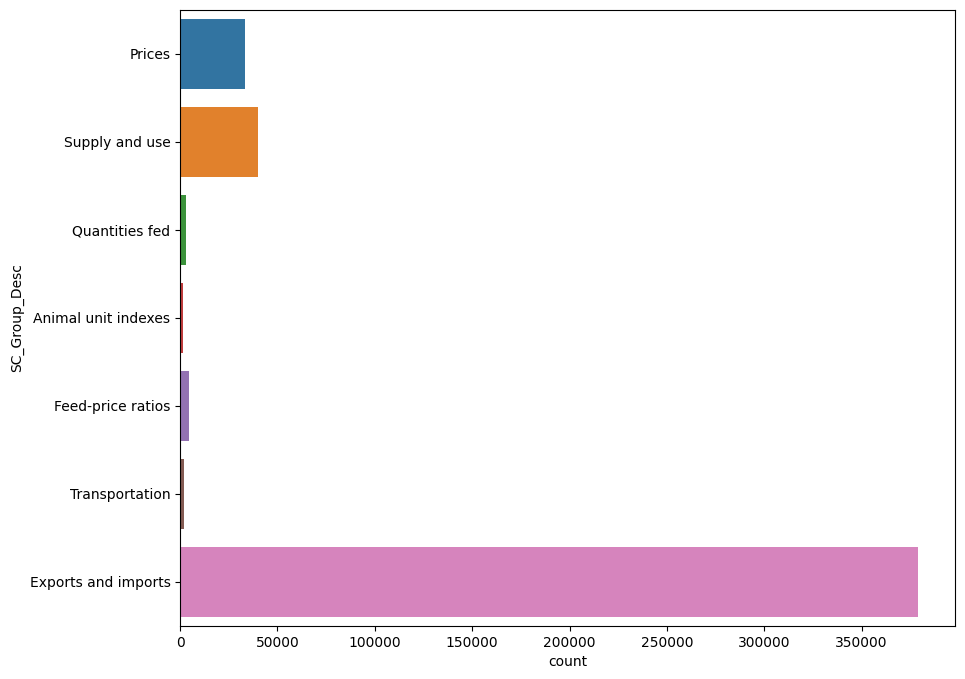

In [61]:
#Count plot of Group descrpition

#Plotting
plt.figure(figsize=(10,8))
sns.countplot(y='SC_Group_Desc', data=df, hue='SC_Group_Desc', legend=False)

Insights of the chart

From the analysis we can see that the chart shows the category labeled as "1" is the largest, containing far more data points than any other group, with around 350,000 entries.The categories like "3" and "5" are also represented to some degree but are smaller than category "1."The categories such as "2," "4," and "6" have very few datas, indicating they are insufficient in the dataset.

### Graph-3

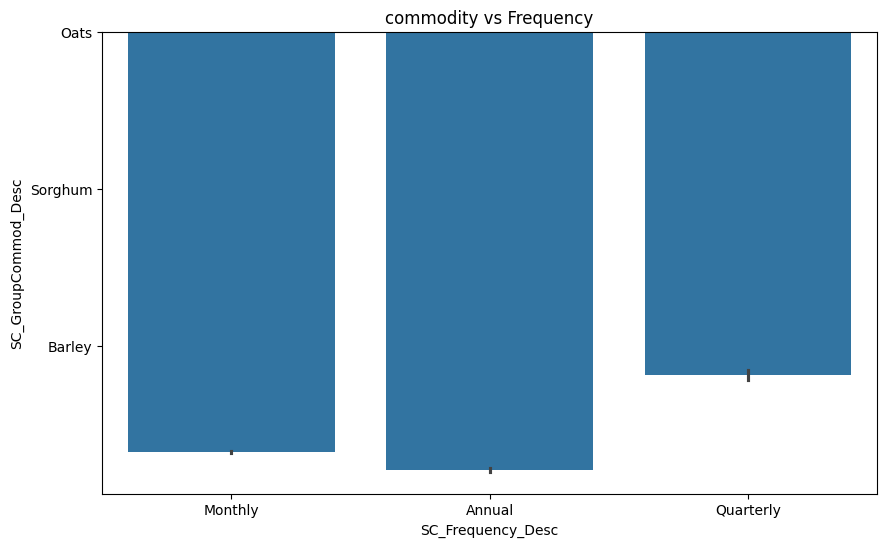

In [66]:
#Showing the barplot of commodity vs frequency

#Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='SC_Frequency_Desc', y='SC_GroupCommod_Desc', data=df)
plt.title('commodity vs Frequency')
plt.show()

Insights of the chart

This chart shows the relationship commodity vs frequency . Here the analysis shows that the Commodity Group 6  has the highest frequency, around 1.5, indicating that it is significantly more frequent compared to other groups.The groups 0, 1, 2, and 3 have  lower frequencies, all close to 0.8, which represents they have less frequently.The group 8 has the lowest frequency, indicating that it's less common compared to other commodities.The groups 5, 9, and 11, These groups have moderate frequencies, this showing  it is relatively stable occurrences.

### Graph-4

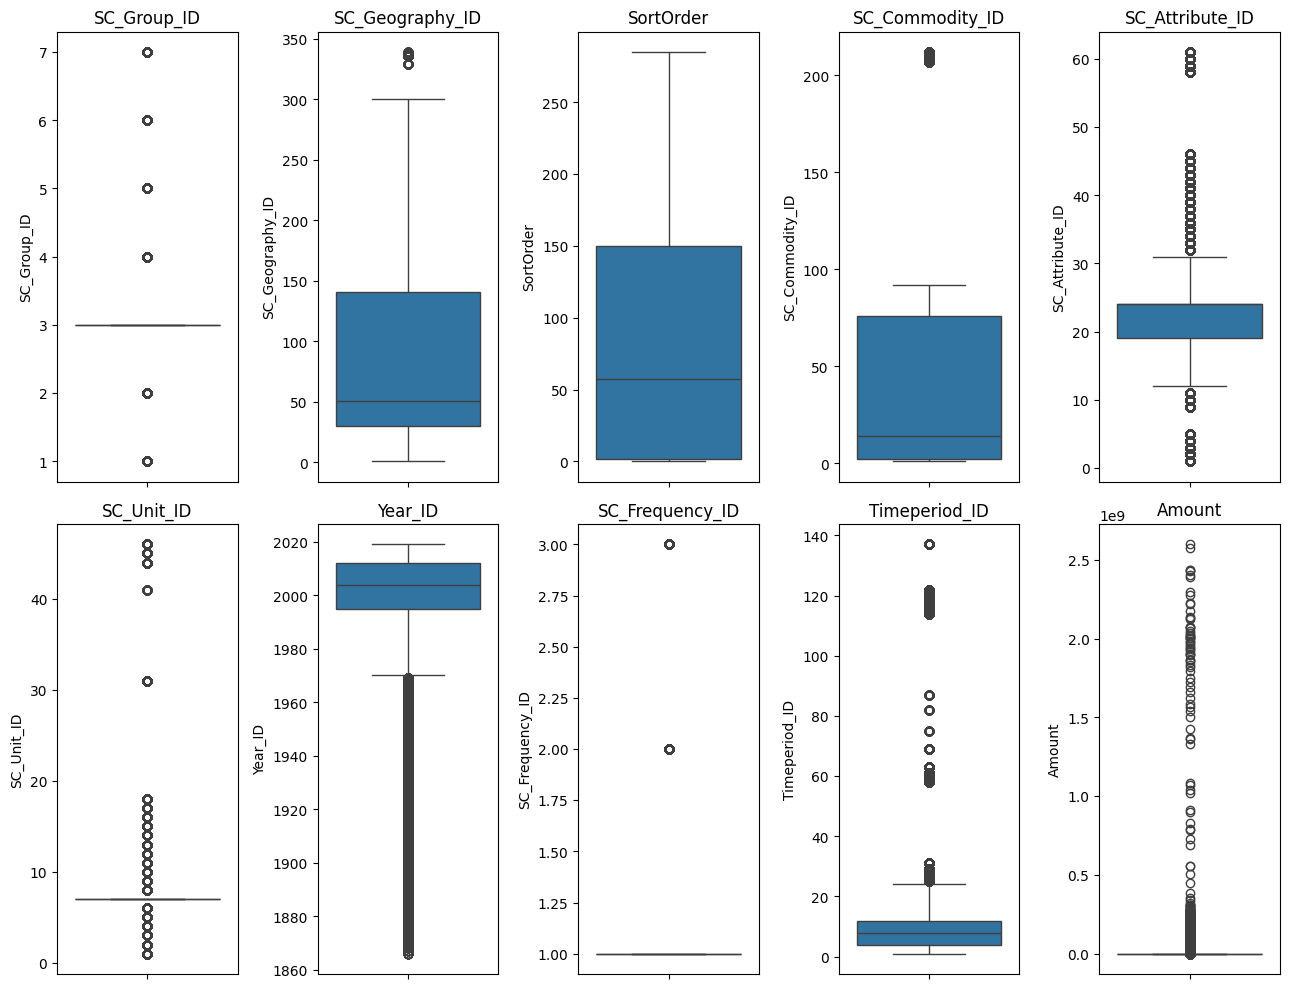

In [14]:
#Checking the outliers 
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
 
# Creating the subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(13, 10))
axes = axes.flatten()
 
# Plotting the boxplots 
for i, column in enumerate(numerical_cols):

    sns.boxplot(y=df[column], ax=axes[i])

    axes[i].set_title(column)
plt.tight_layout()
plt.show()
 

Here,after plotting and finding the outliers we can see that there are outliers in colums so here, by using the IQR method we can treat the outliers



In [15]:
#removing the outliers

# Outlier removing 
def treat_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
 
 
    df[column_name] = df[column_name].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
 
    return df

In [16]:
columns_to_treat = ['SC_Group_ID', 'SC_Geography_ID', 'SC_Commodity_ID', 'SC_Attribute_ID', 'SC_Unit_ID',
                    'Year_ID', 'SC_Frequency_ID', 'Timeperiod_ID']
for column in columns_to_treat:
    if column in df.columns:
        df = treat_outliers(df, column)
 
# Displaying the head
df.head()

,SC_Group_ID,SC_Group_Desc,SC_GroupCommod_Desc,SC_Geography_ID,SortOrder,SC_GeographyIndented_Desc,SC_Commodity_ID,SC_Commodity_Desc,SC_Attribute_ID,SC_Attribute_Desc,SC_Unit_ID,SC_Unit_Desc,Year_ID,SC_Frequency_ID,SC_Frequency_Desc,Timeperiod_ID,Timeperiod_Desc,Amount
0,3.0,Prices,Oats,1.0,0.8,United States,3.0,Oats,11.5,Prices received by farmers,7.0,Dollars per bushel,1969.5,1.0,Monthly,8.0,Aug,0.69
1,3.0,Prices,Oats,1.0,0.8,United States,3.0,Oats,11.5,Prices received by farmers,7.0,Dollars per bushel,1969.5,1.0,Monthly,9.0,Sep,0.69
2,3.0,Prices,Oats,1.0,0.8,United States,3.0,Oats,11.5,Prices received by farmers,7.0,Dollars per bushel,1969.5,1.0,Monthly,10.0,Oct,0.70
3,3.0,Prices,Oats,1.0,0.8,United States,3.0,Oats,11.5,Prices received by farmers,7.0,Dollars per bushel,1969.5,1.0,Monthly,11.0,Nov,0.76
4,3.0,Prices,Oats,1.0,0.8,United States,3.0,Oats,11.5,Prices received by farmers,7.0,Dollars per bushel,1969.5,1.0,Monthly,12.0,Dec,0.76


### Graph-5

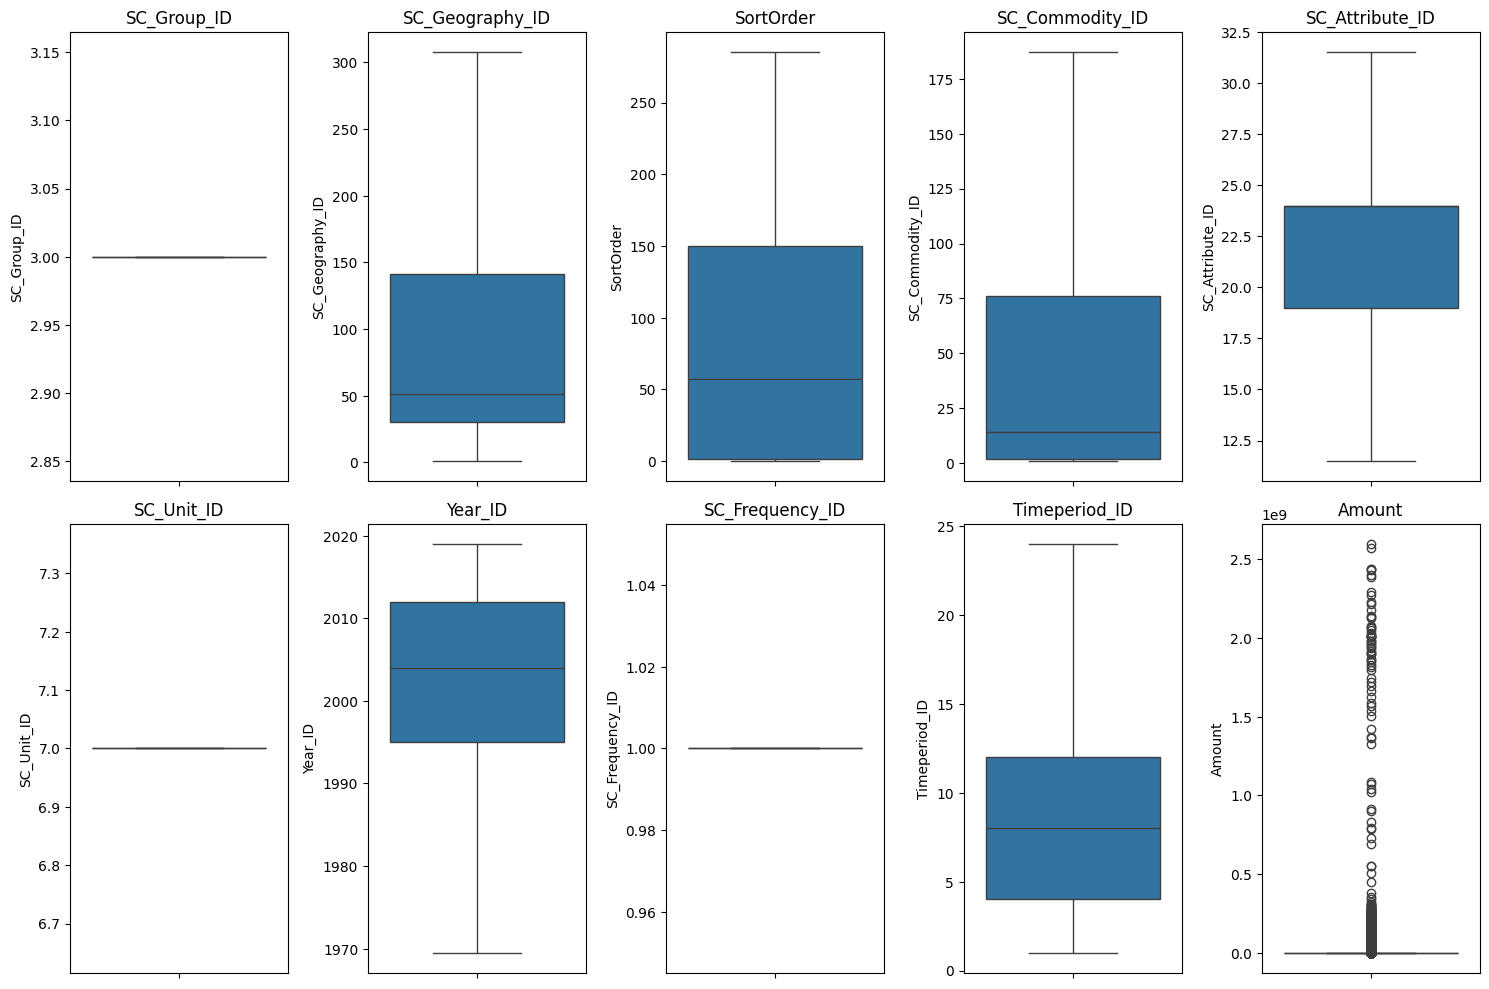

In [17]:
# Selecting the columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
 
# Creating subplots agains to check the outliers
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 10))
axes = axes.flatten()
 
# Plotting 
for i, column in enumerate(numerical_cols):
 
    
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(column)
 
plt.tight_layout()
plt.show()

Outliers removed . Here the boxplot shows the outliers are treated 

In [19]:
# Choosing the colums
numeric_data = df.select_dtypes(include=['int64', 'float64'])
 
# Calculating the correlation matrix
correlation_matrix = numeric_data.corr()
 
correlation_matrix

,SC_Group_ID,SC_Geography_ID,SortOrder,SC_Commodity_ID,SC_Attribute_ID,SC_Unit_ID,Year_ID,SC_Frequency_ID,Timeperiod_ID,Amount
SC_Group_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SC_Geography_ID,NaN,1.000000,0.600624,0.010475,0.128387,NaN,0.122571,NaN,0.015982,-0.022021
SortOrder,NaN,0.600624,1.000000,0.008438,0.114663,NaN,0.124912,NaN,0.017326,-0.027299
SC_Commodity_ID,NaN,0.010475,0.008438,1.000000,0.008991,NaN,0.135145,NaN,-0.152101,-0.013144
SC_Attribute_ID,NaN,0.128387,0.114663,0.008991,1.000000,NaN,-0.008455,NaN,0.072264,0.004002
SC_Unit_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_ID,NaN,0.122571,0.124912,0.135145,-0.008455,NaN,1.000000,NaN,-0.172267,0.007837
SC_Frequency_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Timeperiod_ID,NaN,0.015982,0.017326,-0.152101,0.072264,NaN,-0.172267,NaN,1.000000,0.020071
Amount,NaN,-0.022021,-0.027299,-0.013144,0.004002,NaN,0.007837,NaN,0.020071,1.000000


### Graph-6

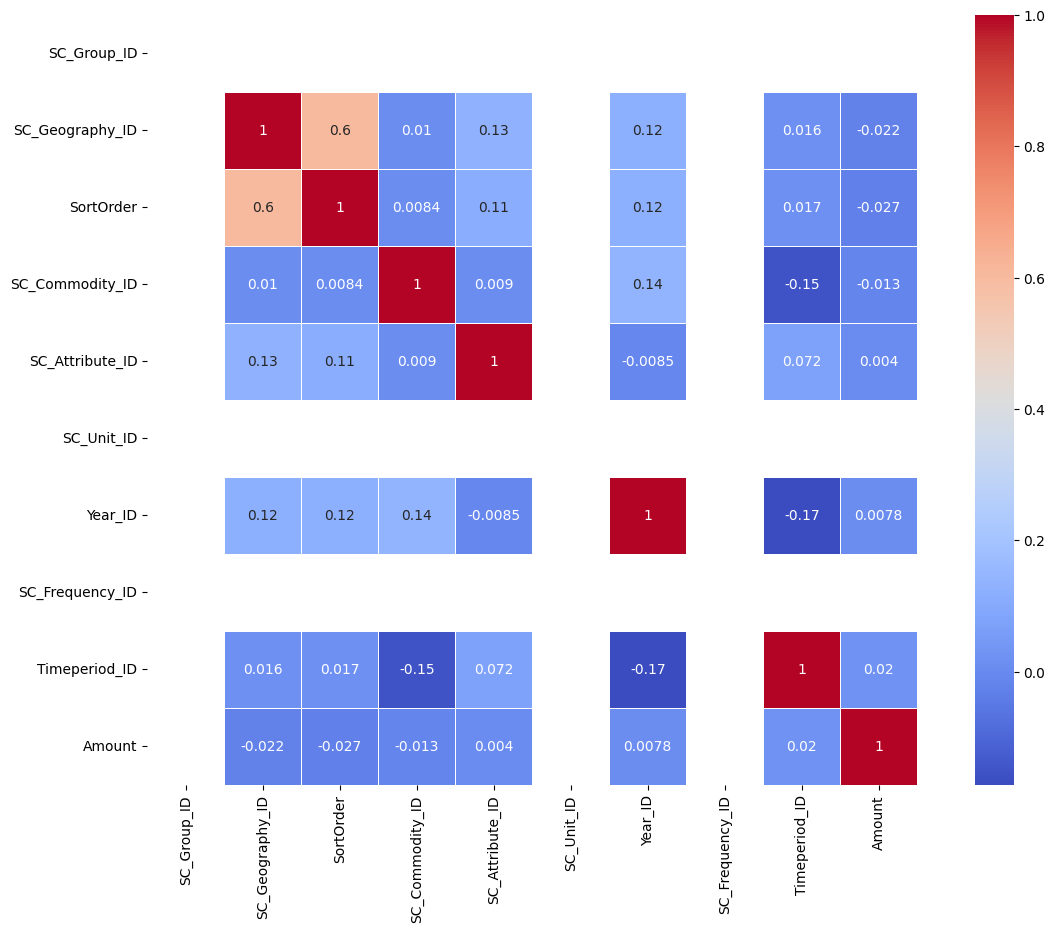

In [20]:
#Plotting the heatmap to find the relation

plt.figure(figsize=(15, 10)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, linewidths=.5)
plt.show()

Insights of the chart

The heatmap shows the correlation matrix between various variables.

1)1 represents a perfect positive correlation,

2)-1 represents a perfect negative correlation, and

3)0 represents no correlation.

The analysis shows that SC_Geography_ID and SortOrder have a strong positive correlation (0.6), indicating that these two variables tend to increase together.Then SC_Attribute_ID and SC_Attribute_ID have a perfect positive correlation (1) since it is a diagonal element.The Year_ID and SC_Frequency_ID show a perfect correlation of 1 with themselves.A moderate positive relationship is seen between SC_Group_ID and other variables like SC_Geography_ID and SC_Attribute_ID.Some variables, like SC_Commodity_ID and Timeperiod_ID, show weak negative correlations, which could indicate some inverse relationships worth exploring.

### FEATURE ENGINEERING

In [21]:
from sklearn.preprocessing import LabelEncoder

# Label encoding
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
 
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
 
df.head()

,SC_Group_ID,SC_Group_Desc,SC_GroupCommod_Desc,SC_Geography_ID,SortOrder,SC_GeographyIndented_Desc,SC_Commodity_ID,SC_Commodity_Desc,SC_Attribute_ID,SC_Attribute_Desc,SC_Unit_ID,SC_Unit_Desc,Year_ID,SC_Frequency_ID,SC_Frequency_Desc,Timeperiod_ID,Timeperiod_Desc,Amount
0,3.0,3,9,1.0,0.8,271,3.0,54,11.5,28,7.0,9,1969.5,1.0,1,8.0,1,0.69
1,3.0,3,9,1.0,0.8,271,3.0,54,11.5,28,7.0,9,1969.5,1.0,1,9.0,47,0.69
2,3.0,3,9,1.0,0.8,271,3.0,54,11.5,28,7.0,9,1969.5,1.0,1,10.0,34,0.70
3,3.0,3,9,1.0,0.8,271,3.0,54,11.5,28,7.0,9,1969.5,1.0,1,11.0,33,0.76
4,3.0,3,9,1.0,0.8,271,3.0,54,11.5,28,7.0,9,1969.5,1.0,1,12.0,8,0.76


In [22]:
# Split the data into features (x) and target (y)
x = df.drop('Amount', axis=1)
y = df['Amount']

### FEATURE SELECTION

In [23]:
model = RandomForestRegressor()
rfe = RFE(estimator=model, n_features_to_select=5)
x_rfe = rfe.fit_transform(x, y)
 
# selected the features
selected_features = x.columns[rfe.support_]
print("Selected Features:", selected_features)
 
# Get the ranking of features
feature_ranking = rfe.ranking_
 
 
print("Feature Ranking:", feature_ranking)
 
model.fit(x, y)
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", importance_df)

Selected Features: Index(['SC_Commodity_Desc', 'SC_Attribute_ID', 'SC_Attribute_Desc', 'Year_ID',
       'Timeperiod_ID'],
      dtype='object')
Feature Ranking: [13 10  3  9  8  5  4  1  1  1 12  2  1 11  6  1  7]
Feature Importances:
                       Feature    Importance
7           SC_Commodity_Desc  2.418740e-01
11               SC_Unit_Desc  1.799980e-01
12                    Year_ID  1.274499e-01
6             SC_Commodity_ID  1.065419e-01
8             SC_Attribute_ID  1.054923e-01
15              Timeperiod_ID  1.025858e-01
9           SC_Attribute_Desc  9.226968e-02
2         SC_GroupCommod_Desc  2.404217e-02
5   SC_GeographyIndented_Desc  1.810316e-02
14          SC_Frequency_Desc  1.116944e-03
16            Timeperiod_Desc  5.257932e-04
4                   SortOrder  3.176034e-07
3             SC_Geography_ID  1.740433e-07
1               SC_Group_Desc  3.460905e-09
10                 SC_Unit_ID  0.000000e+00
13            SC_Frequency_ID  0.000000e+00
0              

In [24]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


### FEATURE SCALING

In [26]:
# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### MODEL IMPLEMENTATION 

In [28]:
# Initialize models , here we take the models 

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'XGBoost Regressor': xgb.XGBRegressor()
}

### MODEL EVALUATION

In [30]:
# Train and test models
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

results = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Store results
    results[model_name] = {
        'R2 Score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred)
    }

# Displaying the evaluation 
results_df = pd.DataFrame(results).T
results_df

,R2 Score,MSE,RMSE,MAE
Linear Regression,0.005340,6.481645e+14,2.545907e+07,2.002664e+06
Decision Tree Regressor,0.976849,1.508650e+13,3.884135e+06,1.203575e+05
Random Forest Regressor,0.985140,9.683634e+12,3.111854e+06,1.020884e+05
Gradient Boosting Regressor,0.434136,3.687419e+14,1.920265e+07,1.079139e+06
XGBoost Regressor,0.935918,4.175889e+13,6.462112e+06,2.499910e+05


### HYPERPARAMETER TUNING

In [32]:
# Define the model, Here we defining the model 
rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [10, 20, 30],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]        # Whether to use bootstrap samples
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(x_train, y_train)

# Finding the best parameters
print("The Best parameters is : ", grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\kalid\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


The Best parameters is :  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}


### MODEL EVALUATION AFTER HYPERPARAMETER TUNING

In [36]:
best_rf = grid_search.best_estimator_
# Train and test models
results_after = {}
for model_name, model in models.items():
    if model_name == 'Random Forest Regressor':
        model = best_rf
    else:
        model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Store results
    results_after[model_name] = {
        'R2 Score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
    }

In [37]:
# Displaying the evaluation results after hyperparameter tuning
results_after_df = pd.DataFrame(results_after).T
results_after_df

,R2 Score,MSE
Linear Regression,0.005340,6.481645e+14
Decision Tree Regressor,0.977014,1.497870e+13
Random Forest Regressor,0.984696,9.973058e+12
Gradient Boosting Regressor,0.434136,3.687419e+14
XGBoost Regressor,0.935918,4.175889e+13


### IDENTIFY THE BEST MODEL

In [38]:
# Identify the model for best performing 
best_model_name = results_after_df['R2 Score'].idxmax()
print(f"The best model performing here is: {best_model_name}")

The best model performing here is: Random Forest Regressor


### SAVING THE MODEL

In [55]:
# Save the model
import joblib
joblib.dump(model, 'Random Forest.pkl')


['Random Forest.pkl']

### LOADING THE MODEL WHICH IS SAVED


In [56]:
import joblib
loaded_model = joblib.load('Random Forest.pkl')


In [57]:
# Created a Dataset with the selected features from feature selection
unseen_data = pd.read_csv("Unseen data.csv")

unseen_data.head()

,SC_Group_ID,SC_Group_Desc,SC_GroupCommod_Desc,SC_Geography_ID,SortOrder,SC_GeographyIndented_Desc,SC_Commodity_ID,SC_Commodity_Desc,SC_Attribute_ID,SC_Attribute_Desc,SC_Unit_ID,SC_Unit_Desc,Year_ID,SC_Frequency_ID,SC_Frequency_Desc,Timeperiod_ID,Timeperiod_Desc
0,1,101,1923,11,101,54,1,80,53,55,82,418,1951,2,300,25,11
1,2,134,2000,22,102,88,2,94,96,12,25,964,1952,1,201,21,22
2,3,152,2500,33,103,25,3,68,38,19,37,927,1952,6,109,6,33
3,4,342,1500,44,104,33,5,52,20,34,9,977,1997,5,183,12,44
4,5,654,1273,55,105,66,8,89,1,77,25,516,1997,8,165,17,55


In [58]:
# Making the predictions
predictions = model.predict(unseen_data)

predictions

array([5.0812624e+08, 4.9493482e+08, 4.9493482e+08, 4.9493482e+08,
       4.9493482e+08, 5.0812624e+08, 4.9493482e+08, 4.9493482e+08,
       4.9493482e+08, 4.9493482e+08, 5.0812624e+08, 5.0812624e+08,
       4.9493482e+08, 4.9493482e+08, 4.9493482e+08, 4.9493482e+08,
       4.9493482e+08, 4.9493482e+08, 4.9493482e+08, 4.9493482e+08],
      dtype=float32)

### CONCLUSION

In conclusion, 
The machine learning model developed in this project has successfully demonstrated its ability to predict feed grain prices with a high degree of accuracy. By leveraging historical data, geographical information, and temporal factors, the model provides valuable insights that can aid farmers, suppliers, and market analysts in making informed decisions regarding production, inventory management, and pricing strategies. The predictive power of this model can help mitigate the challenges posed by market demand fluctuations, seasonal trends, and economic factors.

### FUTURE WORK

Future work could focus on integrating additional variables such as weather patterns, global economic indicators, and more granular geographical data to further enhance the model’s accuracy and robustness. Additionally, exploring advanced machine learning techniques and models could provide even more precise predictions, thereby offering greater support to stakeholders in the agricultural sector